# Evaluate an alignment prediction compared to the groundtruth alignment

The alignment prediction has been generated by `sm-dtw`
The groundtruth alignment has been generated when the paired 'reference' and 'test' sequences where generated.

- a phyllotaxis sequence is an ordered sequence of values representing the divergence angles and internode length between 'organs' (e.g. leaves, fruits, flowers, branches) along the stem of a plant
- a pair of sequences are two related sequences: one "reference" and one "test" derived from the "reference" after several modifications.

## Import data
You can either start from real or simulated data.

In both cases, you need :
- at least one pair of sequences (like 2 modes of measures). You can also start with several pairs of sequences.
- a groundtruth alignement between these two (or more) sequences.
- an alignment prediction generated by `sm-dtw`.

In case you do not have any paired sequences, use the follwoing notebook to generate them : `Simulate_a_pair_of_sequence.ipynb` and `Simulate_data_from_config_table.ipynb`.


### Import the paired sequence(s) that was used as input for `sm-dtw`

In [1]:
root=dirname(getwd()) #store the path of `R_simul-eval` folder to manage later where outputs will be directed

seqs=read.csv("../example_data/Notebook_tests/reference_sequences.csv")
colnames(seqs)[3]="internodes" #fix the capital I for internodes
tests=read.csv("../example_data/Notebook_tests/test_sequences.csv")
colnames(tests)[3]="internodes"
align.gt=read.csv("../example_data/Notebook_tests/align_intervals.csv")

### Import the result of `sm-dtw` (prediction of the alignment between the paired sequence(s))
/!\ Check that the alignment prediction corresponds to the data of the paired sequences you upload. If not, re-run `sm-dtw` with these data 

In [2]:
raw_predictions=read.csv("../example_data/Notebook_tests/nb_alignment_result.csv", header=TRUE)

Warning message in file(file, "rt"):
“impossible d'ouvrir le fichier '../example_data/Notebook_tests/nb_alignment_result.csv' : Aucun fichier ou dossier de ce type”


ERROR: Error in file(file, "rt"): impossible d'ouvrir la connexion


## Convert `sm-dtw` results into a biologically interpretable alignment

In [10]:
source("../source/plot_sequences_sources.R") #library for plotting
source('../source/eval_dtw_sources.R') #library to evaluate dtw prediction

In [11]:
dtw_results=convert_dtw_results(raw_predictions, seq.ref = seqs, seq.test = tests)

Converting dtw results for PlantID = Plant#1 
Converting dtw results for PlantID = Plant#2 
Converting dtw results for PlantID = Plant#3 
Converting dtw results for PlantID = Plant#4 
Converting dtw results for PlantID = Plant#5 


## Check visually the prediction with an alignment

In addition to the plots displayed below the code cell of the notebook, a pdf with the plot(s) can be automatically generated as well if the option PDF is set to TRUE.

Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 4 row(s) containing missing values (geom_path).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 4 row(s) containing missing values (geom_path).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 4 row(s) containing missing values (geom_path).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 4 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 row(

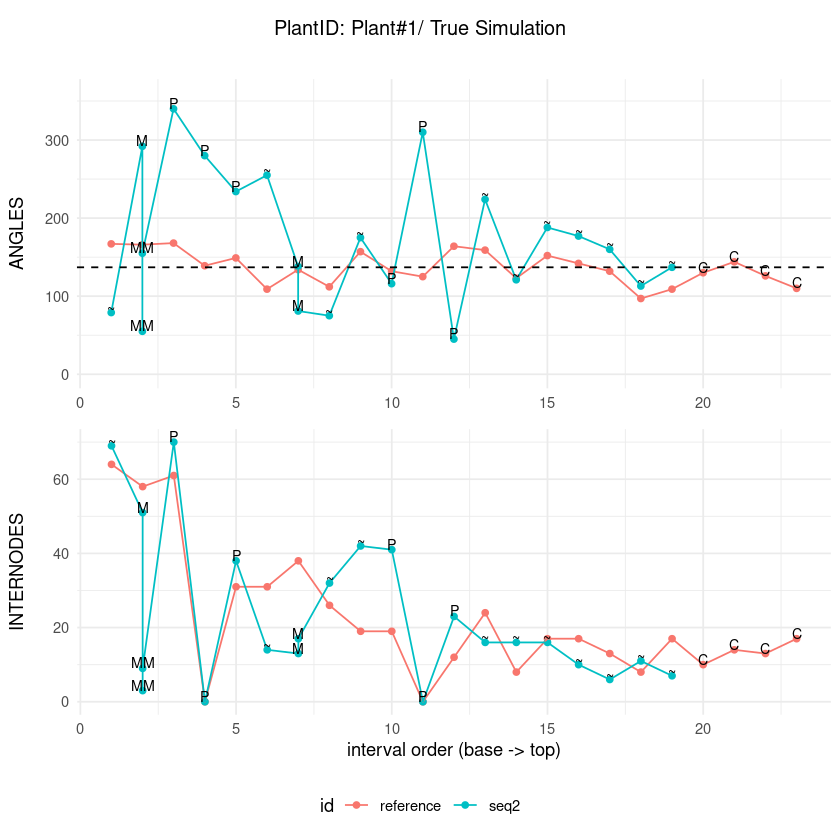

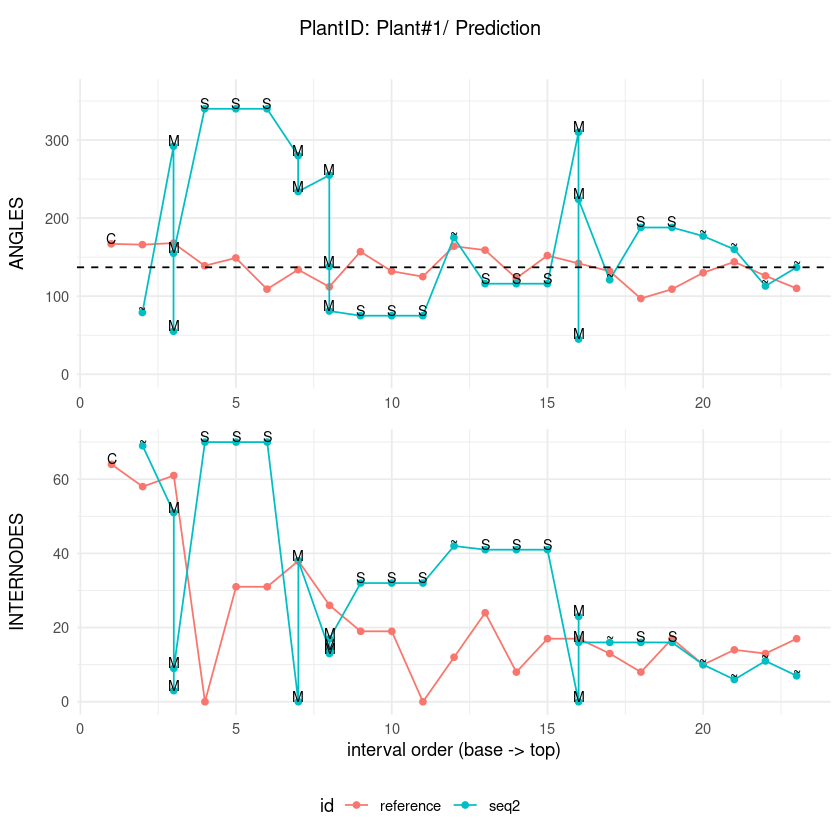

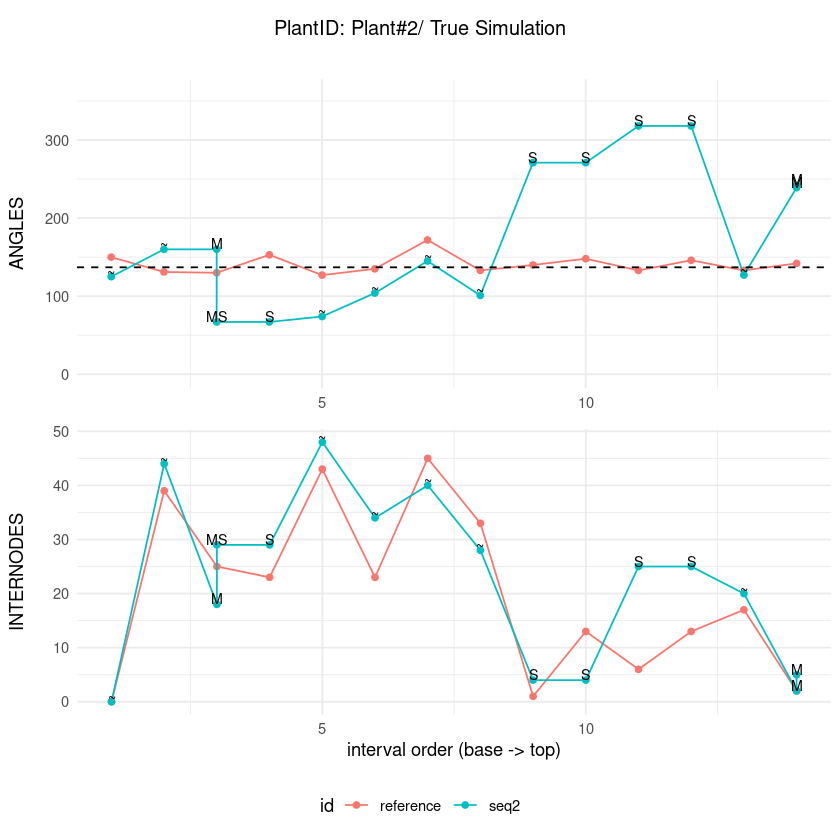

Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


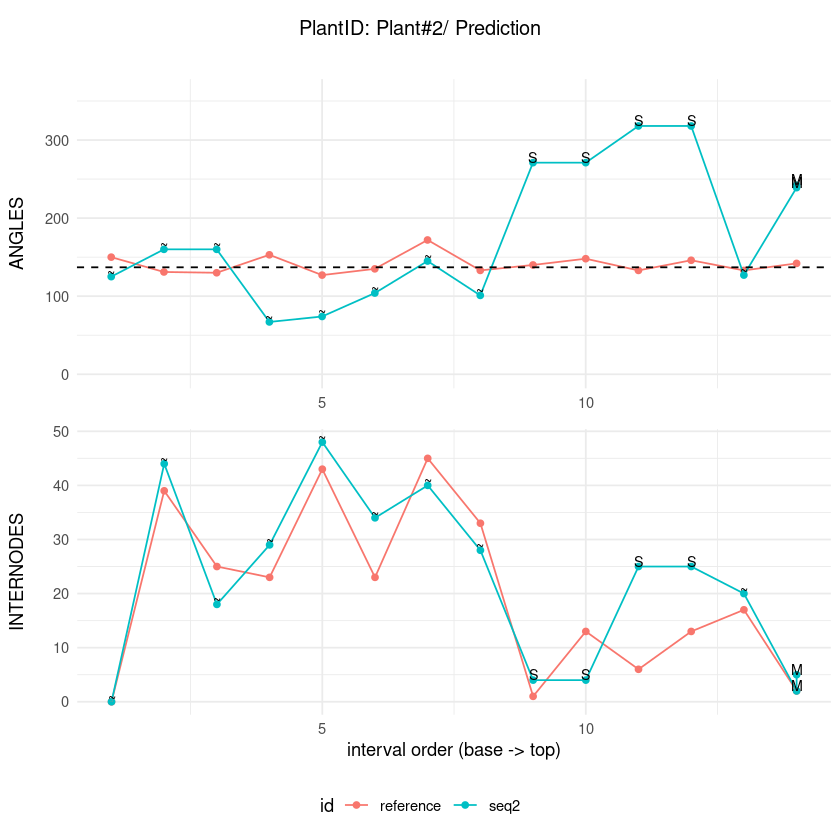

Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


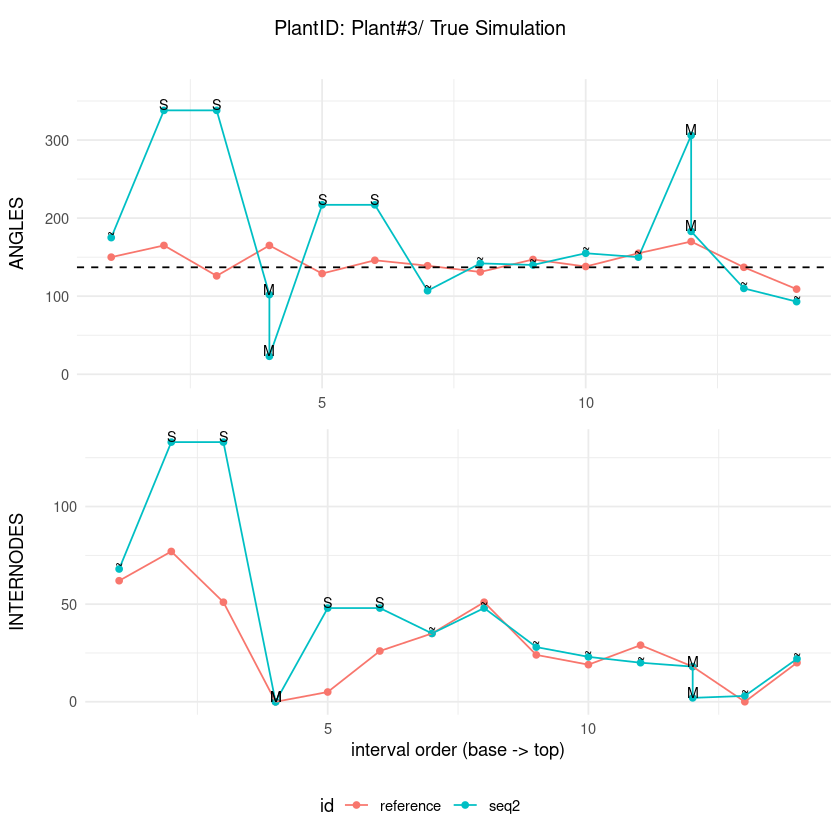

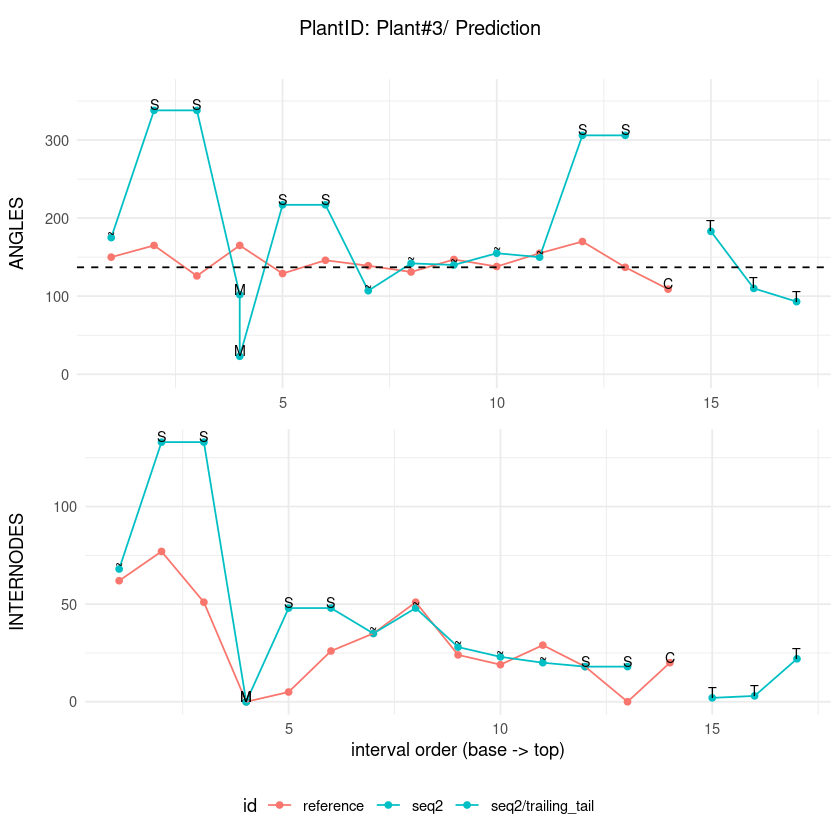

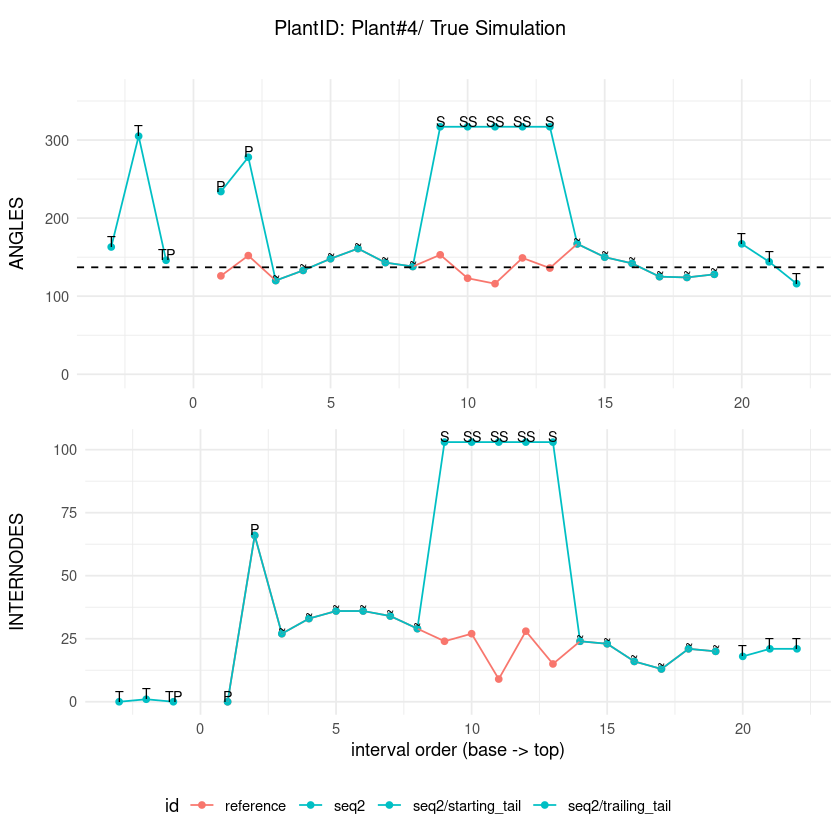

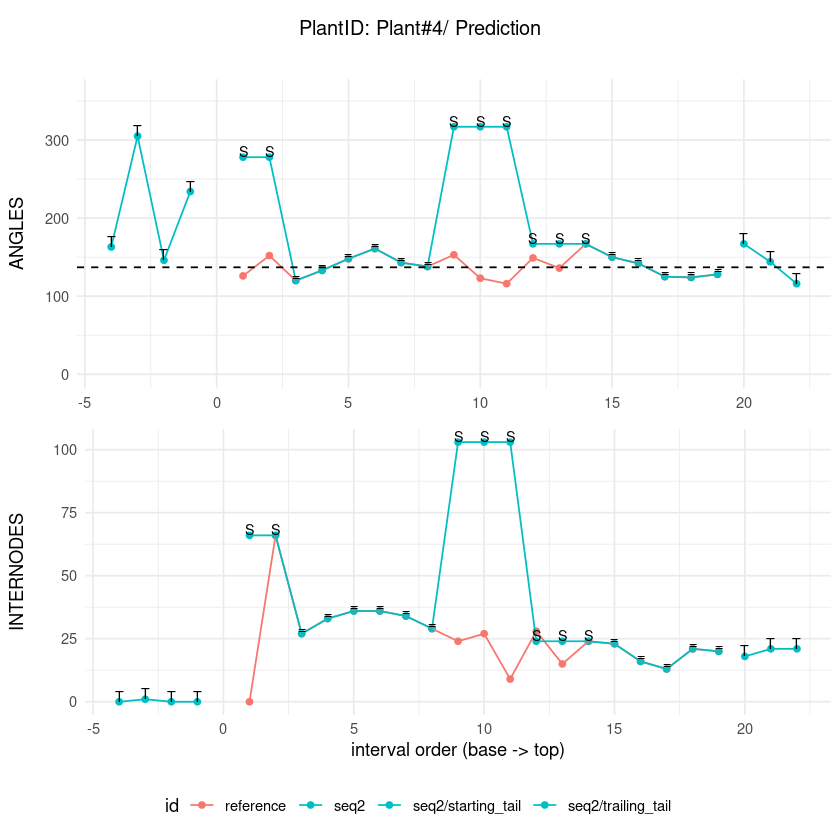

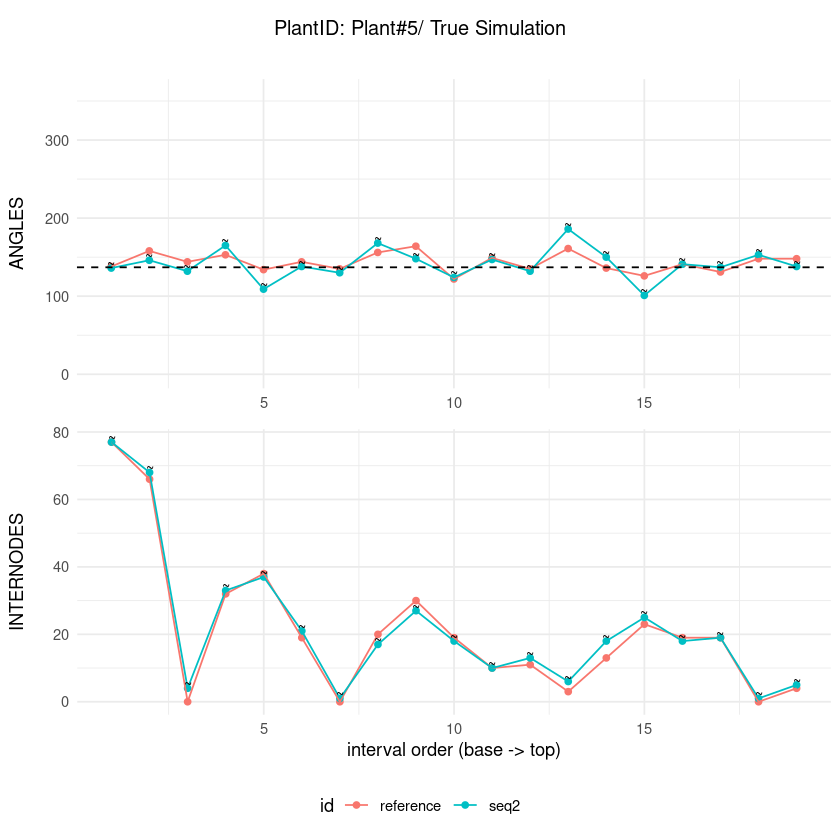

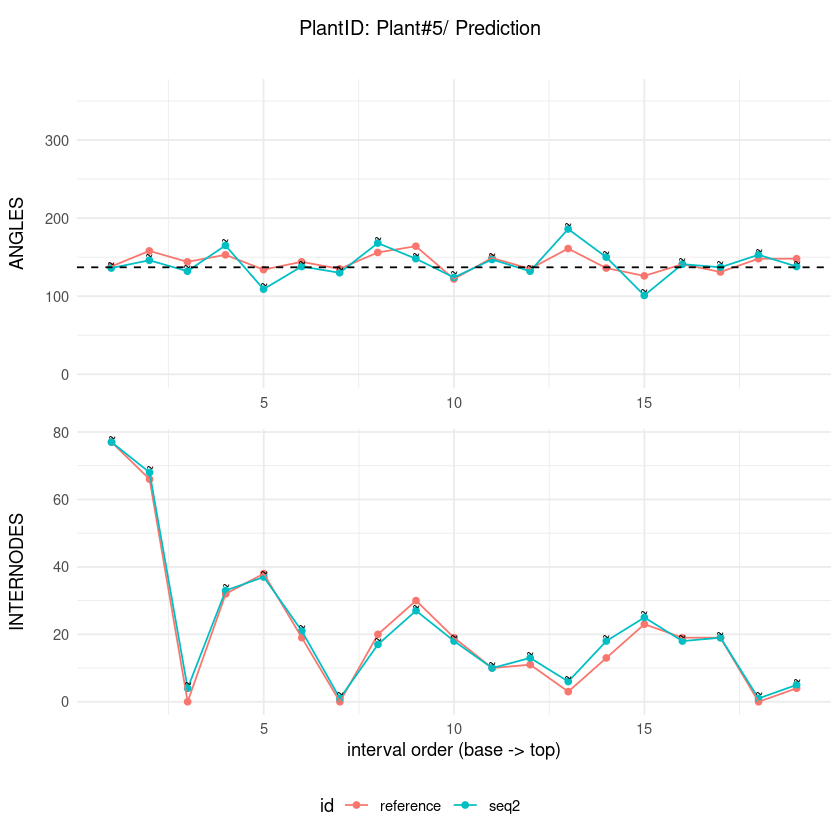

In [15]:
setwd(paste0(root,"/example_data/Notebook_tests")) #Set the working directory to control where the pdf plot will be generated
compare_plots(seq.ref=seqs, seq.test=tests, true_align=align.gt, dtw_results = dtw_results,
              #PlantID =c("Plant#1", "Plant#2"),  #default: plots are drawned for all plants
              #PDF=TRUE, pdf.name = "test.pdf",   #default: PDF=TRUE, pdf.name = "Compare_Prediction_Plots.pdf"
              verbose = FALSE # default=FALSE, recommanded for debug only
             )
setwd(paste0(root, "/notebooks")) #reset the working directory to the initial value (so that cells can be run several time without restaring the kernel)

## Evaluate the prediction

### Detail of each interval alignment

In [14]:
prediction_eval=evaluate_align_prediction(dtw_results=dtw_results, true_align=align.gt, verbose = TRUE)
#View(prediction_eval)
head(prediction_eval)

## Starting analysis for PlantID = Plant#1 .
[1] "both reference sequence have 23 intervals"
[1] "both test sequences (before/after dtw) have 22 intervals"
## Starting analysis for PlantID = Plant#2 .
[1] "both reference sequence have 14 intervals"
[1] "both test sequences (before/after dtw) have 13 intervals"
## Starting analysis for PlantID = Plant#3 .
[1] "both reference sequence have 14 intervals"
[1] "both test sequences (before/after dtw) have 14 intervals"
## Starting analysis for PlantID = Plant#4 .
[1] "both reference sequence have 19 intervals"
[1] "both test sequences (before/after dtw) have 21 intervals"
## Starting analysis for PlantID = Plant#5 .
[1] "both reference sequence have 19 intervals"
[1] "both test sequences (before/after dtw) have 19 intervals"


,PlantID,test.interval,N.align,align.score,dtw.predict,dtw.true,dtw.cost,code.eval,dtw.eval
,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,Plant#1,1,1,0.5,~,~,0.35937793,correct,error
2,Plant#1,2,1,0.5,M,M,0.10411658,correct,error
3,Plant#1,3,1,0.5,M,MM,0.10411658,correct,error
4,Plant#1,4,1,0.5,M,MM,0.10411658,correct,error
5,Plant#1,5,3,NA,S,P,0.23805357,error,error
6,Plant#1,6,1,0.5,M,P,0.07856742,error,error


### Highlight the errors of prediction on the plot
Again, a pdf can be generated.

Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 4 row(s) containing missing values (geom_path).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 4 row(s) containing missing values (geom_path).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 4 row(s) containing missing values (geom_path).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 4 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 row(

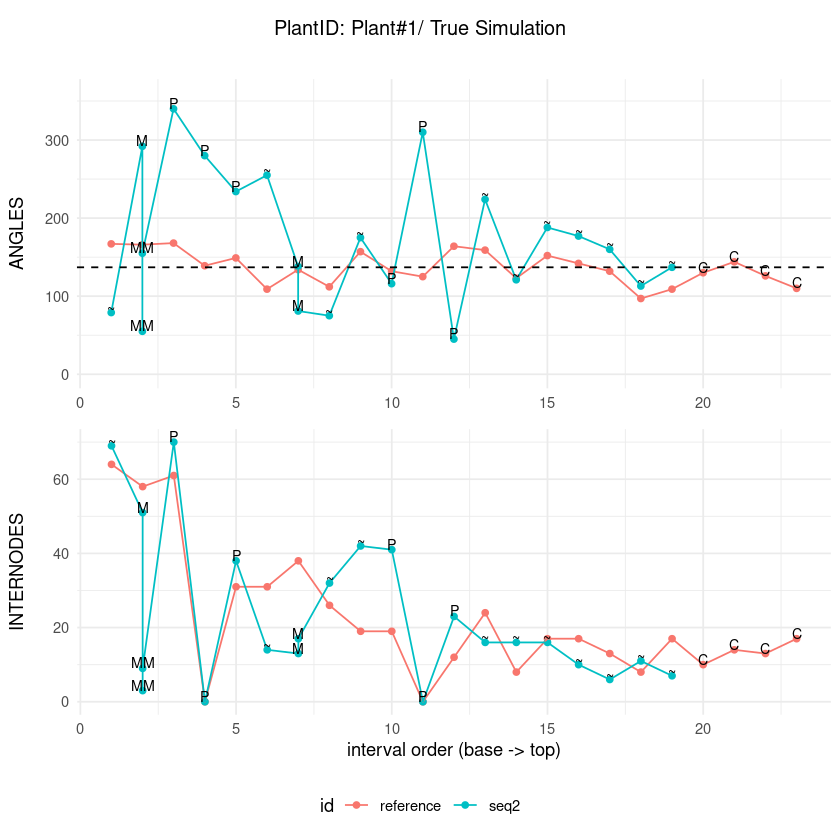

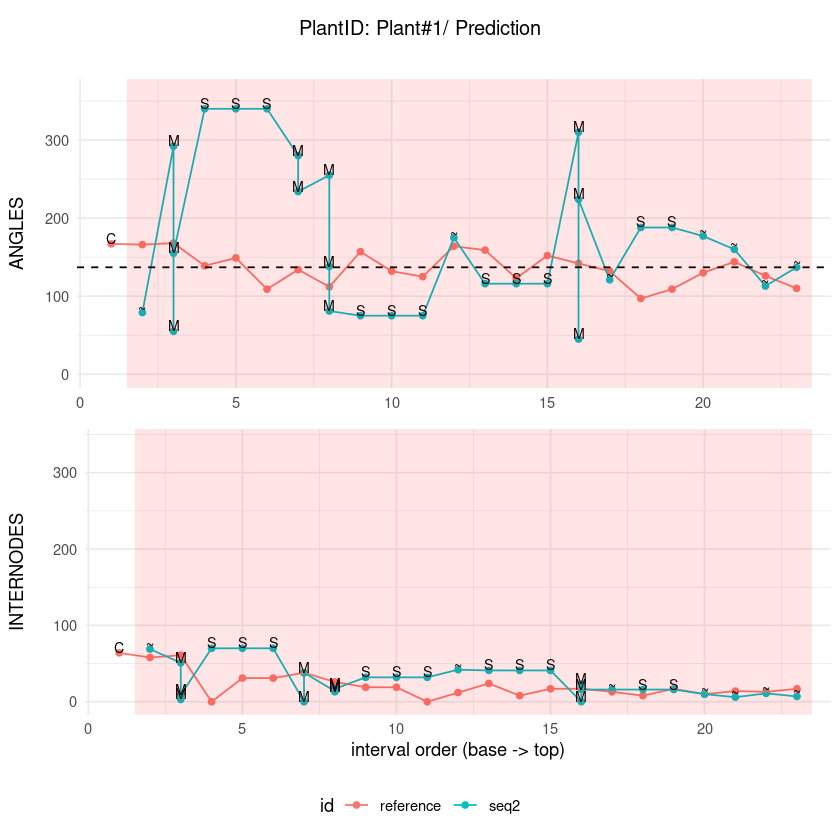

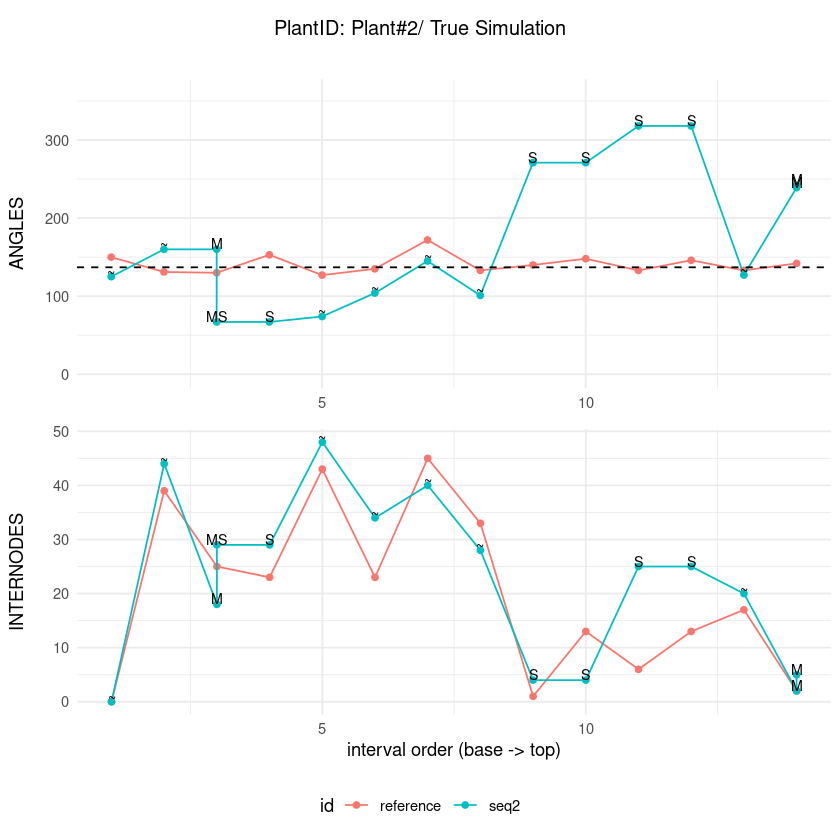

Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


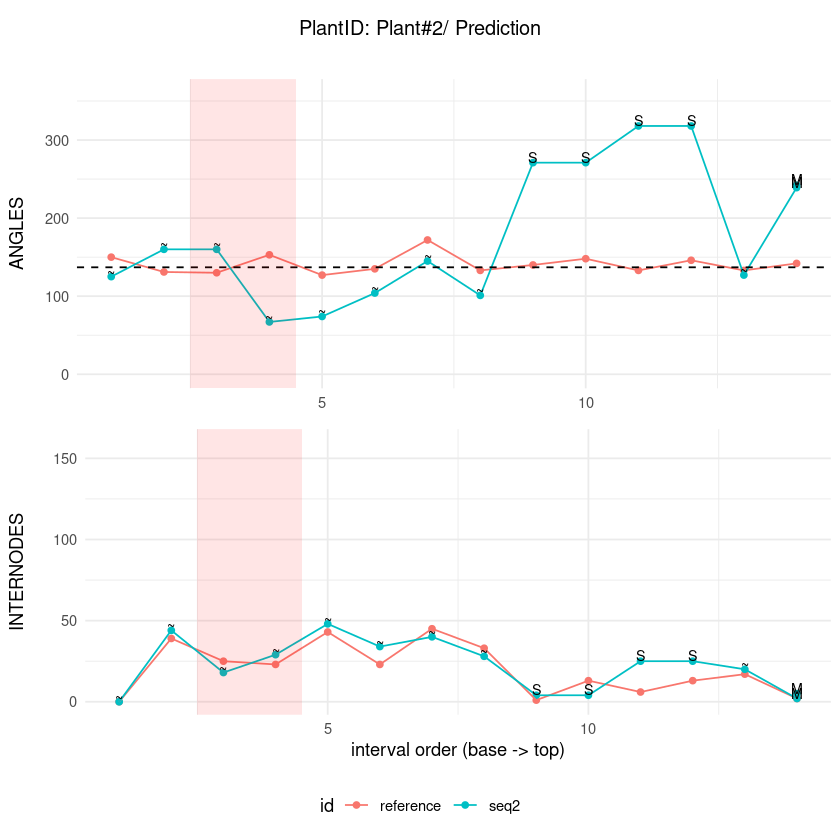

Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


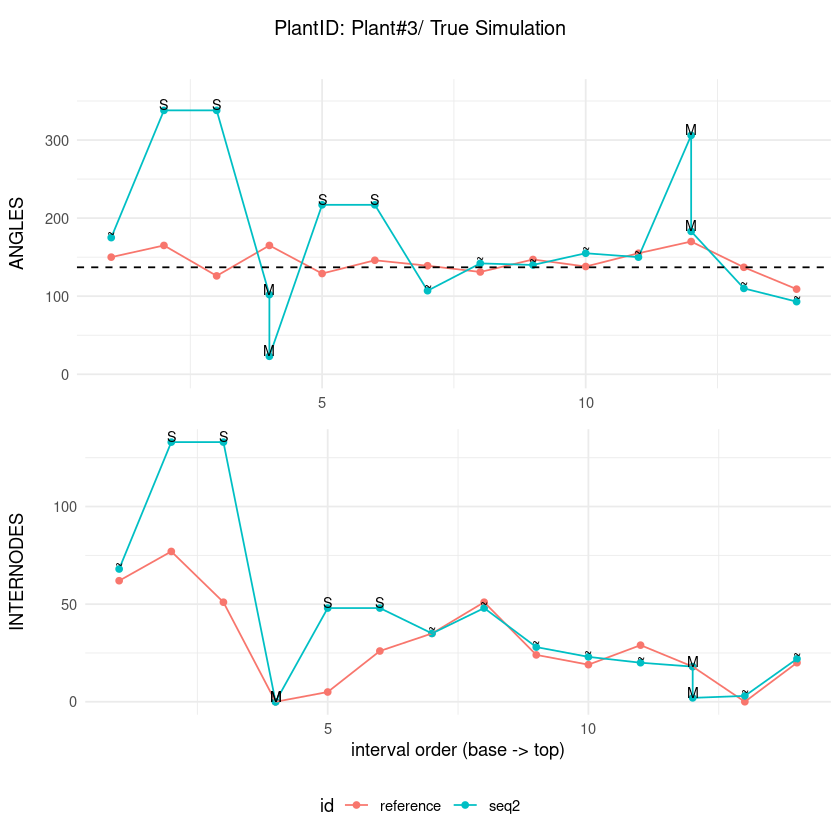

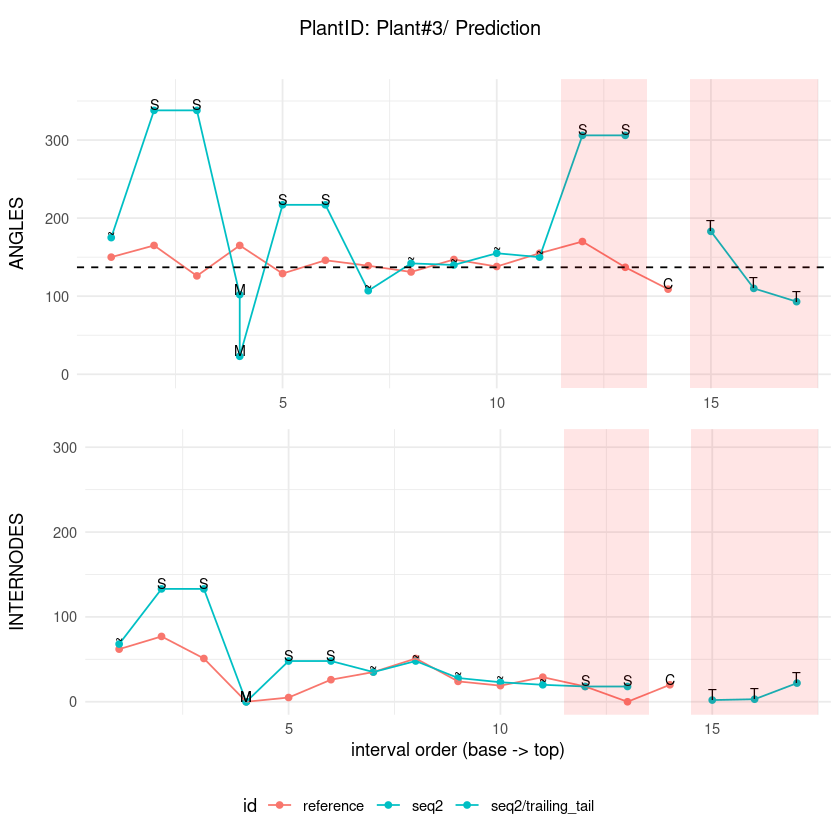

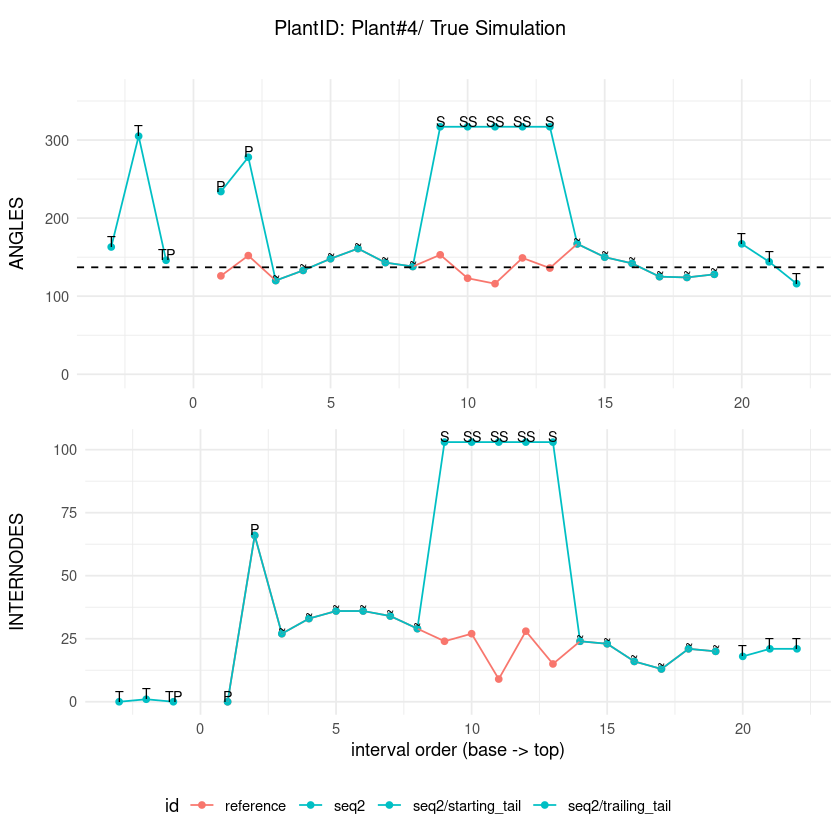

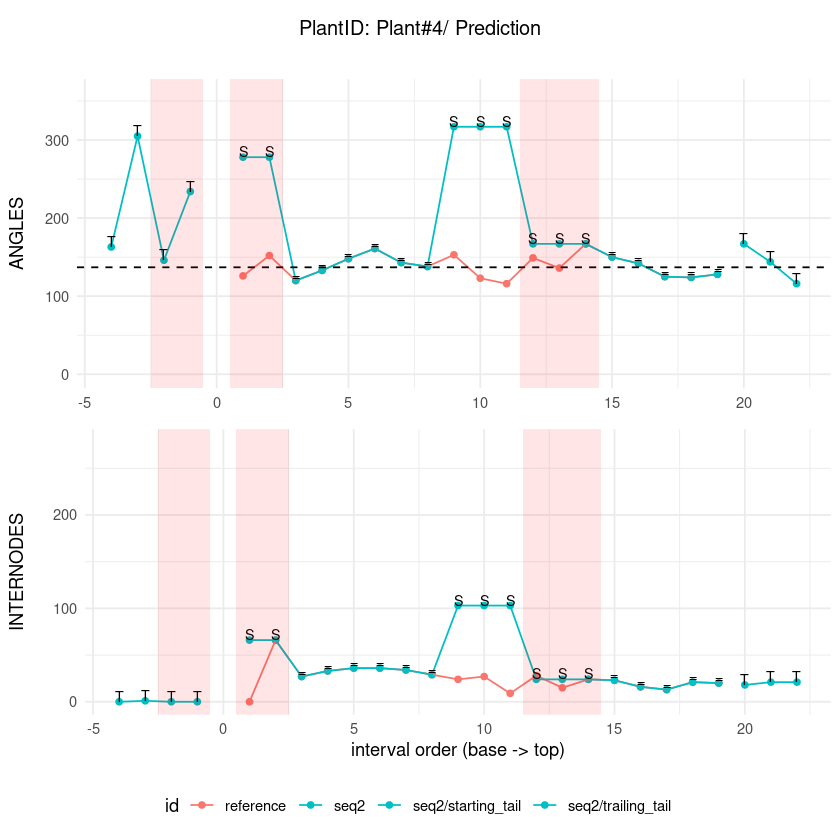

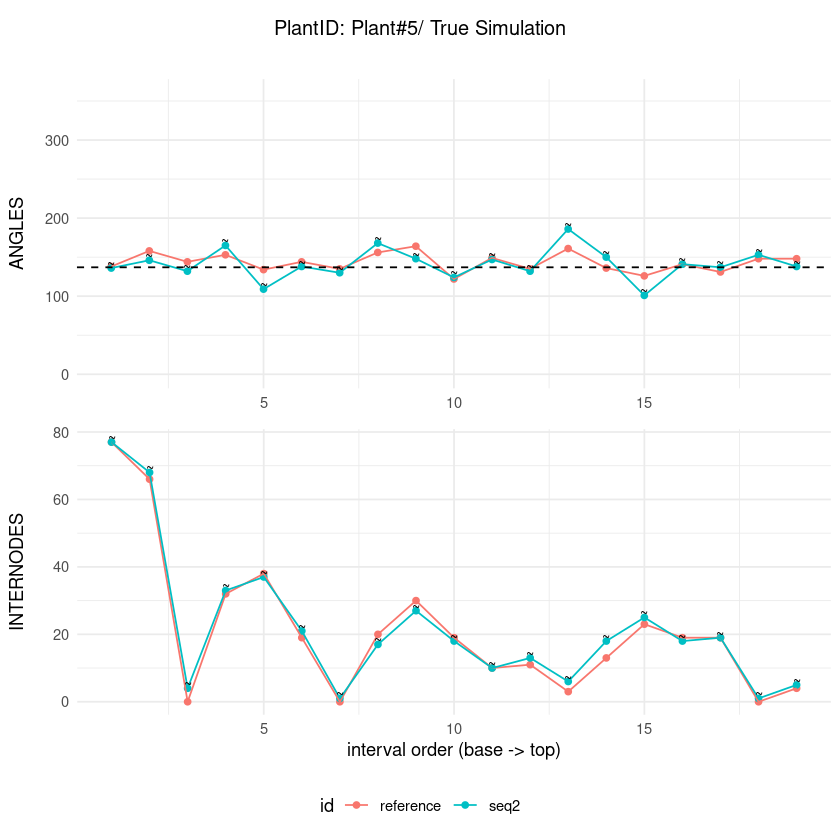

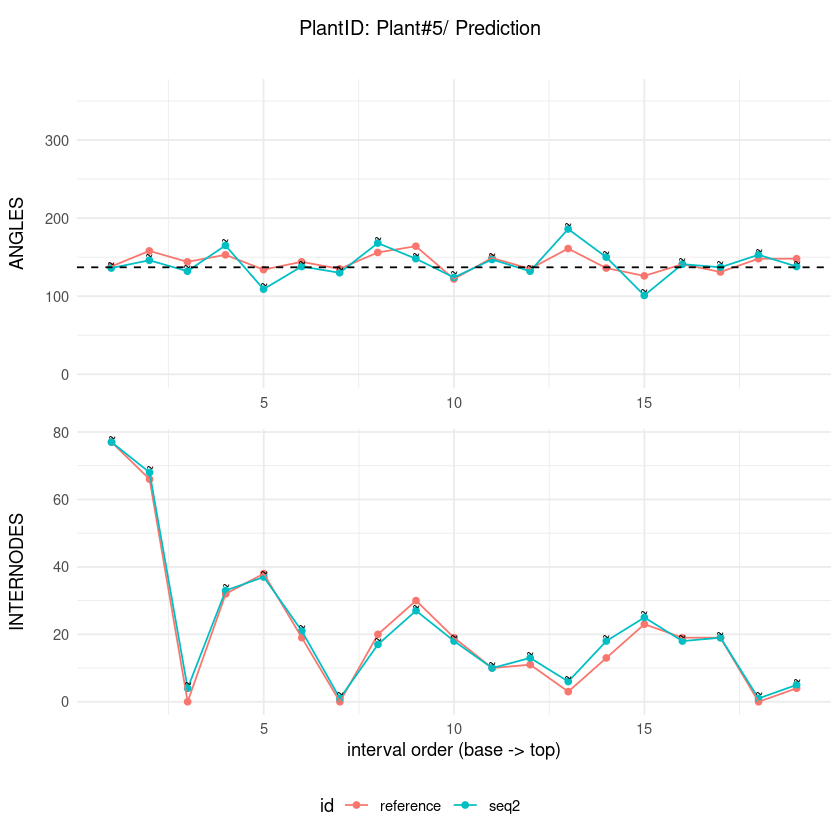

In [17]:
setwd(paste0(root,"/example_data/Notebook_tests")) #Set the working directory to control where the pdf plot will be generated

compare_plots(seq.ref=seqs, seq.test=tests, true_align=align.gt, dtw_results = dtw_results,  
              prediction.eval= prediction_eval #the previous analysis is re-used in the plot
              #PlantID =c("Plant#1", "Plant#2"),  #default: plots are drawned for all plants
              #PDF=TRUE, pdf.name = "test.pdf",   #default: PDF=TRUE, pdf.name = "Compare_Prediction_Plots.pdf"
              #verbose = FALSE # default=FALSE, recommanded for debug only
             )

setwd(paste0(root, "/notebooks")) #reset the working directory to the initial value (so that cells can be run several time without restaring the kernel)

### Summary statistics on the quality of the prediction

In [18]:
summarize_prediction_eval(prediction_eval, align.gt, verbose=TRUE)

## Processing PlantID = Plant#1 .
## Processing PlantID = Plant#2 .
## Processing PlantID = Plant#3 .
## Processing PlantID = Plant#4 .
## Processing PlantID = Plant#5 .


plantid,N.ref,N.test,N.dtw.align,Correct.ratio,Match.correct.ratio,NonMatch.correct.ratio
<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
Plant#1,23,22,22,0.0000000,0.0000000,0.0000000
Plant#2,14,13,13,0.8461538,1.0000000,0.6666667
Plant#3,14,14,14,0.7142857,0.7500000,0.6666667
Plant#4,19,21,21,0.8095238,0.9166667,0.6666667
Plant#5,19,19,19,1.0000000,1.0000000,NaN


## Use the alignment prediction as a trustful prediction to evaluate the 'test' measure

In [19]:
summarize_align_prediction(dtw_results, seqs, tests, count.as = "number")

PlantID,Ref.seq.length,Test.seq.length,Nb.chop.start,Nb.chop.end,Nb.tail.start,Nb.tail.end,Nb.SPLIT.event,Nb.organs.missed.per.SPLIT,Nb.MERGE.event,Nb.organs.added.per.MERGE,TOTAL.ORGAN.MISS,TOTAL.ORGAN.ADDED,TOTAL.SEGMENTATION.ERROR,TOTAL.MATCH,ANGLES.difference,ANGLES.sd,INTERNODES.difference,INTERNODES.sd
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Plant#1,23,22,1,0,0,0,4,"2,2,2,1",4,"2,1,2,2",8,7,15,7,1.428571,43.12717,-3.4285714,13.636436
Plant#2,14,13,0,0,0,0,2,"1,1",1,1,2,1,3,9,22.333333,36.79674,-1.4444444,6.085045
Plant#3,14,14,0,1,0,3,3,"1,1,1",1,1,4,4,8,6,-1.500000,20.58883,-0.3333333,5.609516
Plant#4,19,21,0,0,4,3,3,"1,2,2",0,0,5,7,12,11,0.000000,0.00000,0.0000000,0.000000
Plant#5,19,19,0,0,0,0,0,0,0,0,0,0,0,19,2.210526,13.02382,-0.7894737,2.097060
